In [31]:
import pandas as pd
import matplotlib.pyplot as plt

# Load the dataset
df = pd. read_csv('insurance_claims_cleaned_fixed.csv')

In [32]:
#lets take a look at the incident_type column

df['incident_type'].value_counts()

incident_type
Multi-vehicle Collision     419
Single Vehicle Collision    403
Vehicle Theft                94
Parked Car                   84
Name: count, dtype: int64

In [33]:
#lets see how incident type affects fraud reported
df.groupby('incident_type')['fraud_reported'].value_counts(normalize = True)



incident_type             fraud_reported
Multi-vehicle Collision   No                0.727924
                          Yes               0.272076
Parked Car                No                0.904762
                          Yes               0.095238
Single Vehicle Collision  No                0.709677
                          Yes               0.290323
Vehicle Theft             No                0.914894
                          Yes               0.085106
Name: proportion, dtype: float64

Multi-vehicle Collision: 27.2% fraud rate

Single Vehicle Collision: 29.0% fraud rate


Key insights:

Collisions (especially single vehicle) have much higher fraud rates.
Parked car and vehicle theft claims are much less likely to be fraudulent.

Explore incident_severity and collision_type for similar patterns.
Visualize these rates (bar plot) for clearer comparison.

In [34]:
#Now lets take a look at incident severity and collision type, to see how they affect fraud reported
df.groupby('incident_severity')['fraud_reported'].value_counts(normalize=True)

incident_severity  fraud_reported
Major Damage       Yes               0.605072
                   No                0.394928
Minor Damage       No                0.892655
                   Yes               0.107345
Total Loss         No                0.871429
                   Yes               0.128571
Trivial Damage     No                0.933333
                   Yes               0.066667
Name: proportion, dtype: float64

Text(0, 0.5, 'Proportion of Fraud Reported')

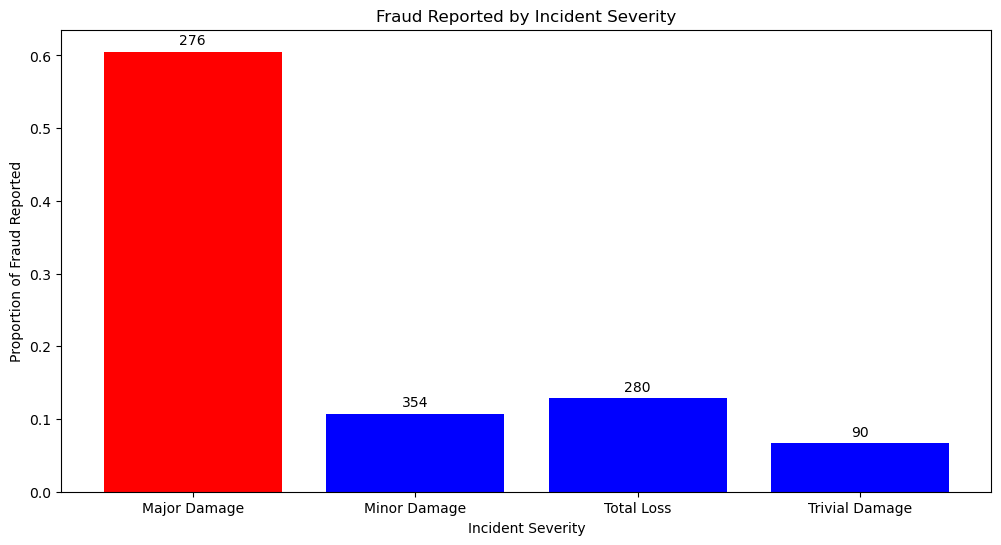

In [46]:
#visualize incident severity and fraud reported
plt.figure(figsize=(12,6))
# Calculate fraud rates for each incident severity
fraud_rates = df.groupby('incident_severity')['fraud_reported'].value_counts(normalize=True).unstack()['Yes']
incident_severities = df['incident_severity'].unique()

# Find the index of the highest fraud rate
max_idx = fraud_rates.idxmax()

# Create a color list: highlight the max bar in red, others in blue
colors = ['red' if sev == max_idx else 'blue' for sev in incident_severities]

#include count of incidents on top of each bar
counts = df['incident_severity'].value_counts()
for i, sev in enumerate(incident_severities):
	plt.text(i, fraud_rates.loc[sev] + 0.01, counts[sev], ha='center', color='black')

plt.bar(incident_severities, fraud_rates.loc[incident_severities], color=colors)
plt.title('Fraud Reported by Incident Severity')
plt.xlabel('Incident Severity')
plt.ylabel('Proportion of Fraud Reported')
